In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_json('../../Data Scraping/data/C&F_sale_fragrances_cleaned.json')
df.head()

,id_product,brand,product_name,size_ml,type,old_price_idr,special_price_idr,discount_percentage
0,1,LOUIS VAREL,Louis Varel My Dream EDP 100 ml,100,EDP,620000,434000,30
1,2,KORLOFF,Miss Korloff EDP 88 ml,88,EDP,1690000,1521000,10
2,3,HUGO BOSS,Hugo Boss Scent Le Parfum Men 100 ml,100,EDP,1680000,1293600,23
3,4,OULLU,Oullu Umbra EDP 15 ml,15,EDP,189000,160650,15
4,5,CRISTIANO RONALDO,Cristiano Ronaldo CR7 Origins EDT 100 ml,100,EDT,1180000,826000,30


In [5]:
# function to add chart's color based on color palette from user input
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


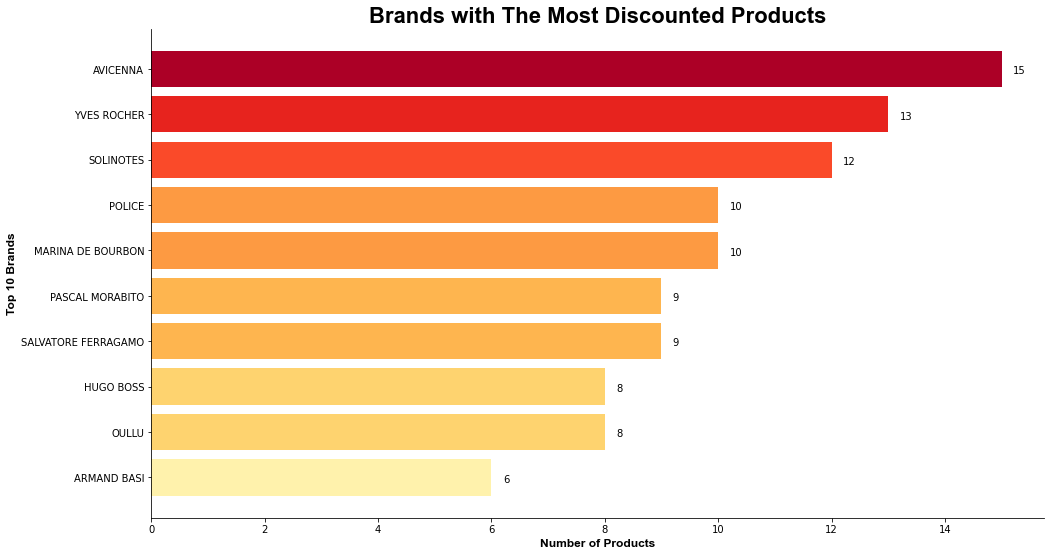

In [7]:
# Brands with the most discounted products
most_discounted_brands = df['brand'].value_counts().head(10)

# Setting x-axis and y-axis
top10_brands = most_discounted_brands.index
top10_value = most_discounted_brands.values

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(top10_brands,top10_value,
       color = colors_from_values(top10_value, "YlOrRd"))

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(i.get_width()),
             size = 10)

# Add Plot Title
ax.set_title('Brands with The Most Discounted Products',
            fontname = 'arial',
            size = 22,
            weight = 'bold')
ax.set_ylabel('Top 10 Brands',
              fontname = 'arial',
              fontsize = 12,
              weight = 'semibold')
ax.set_xlabel('Number of Products',
              fontname = 'arial',
              size = 12,
              weight = 'semibold')

# saving plot
plt.savefig('../visualization/most_discounted_brands.png',dpi=1000)

# showing plot
plt.show()


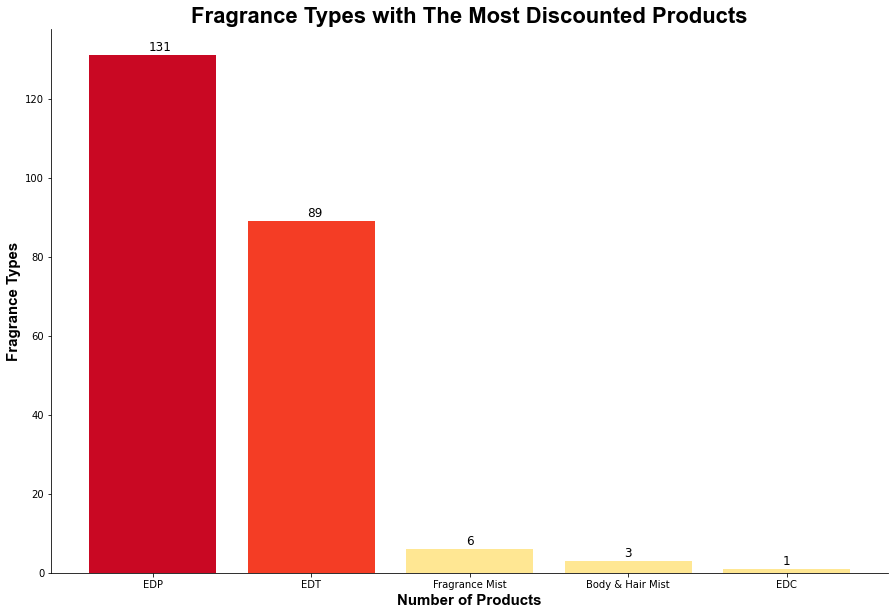

In [ ]:
# Fragrance types with the most discounted products
most_discounted_type = df['type'].value_counts()

# Setting x-axis and y-axis
type = most_discounted_type.index
value = most_discounted_type.values

# Figure Size
fig, ax = plt.subplots(figsize =(15, 10))
 
# Vertical Bar Plot
ax.bar(type,value,
       color = colors_from_values(value, "YlOrRd"))

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_x()+0.375, i.get_height()+1,
             str(i.get_height()),
             size = 12)

# Add Plot Title
ax.set_title('Fragrance Types with The Most Discounted Products',
            fontname = 'arial',
            size = 22,
            weight = 'bold')
ax.set_xlabel('Number of Products',
              fontname = 'arial',
              size = 15,
              weight = 'semibold')
ax.set_ylabel('Fragrance Types',
              fontname = 'arial',
              fontsize = 15,
              weight = 'semibold')

# saving plot
plt.savefig('../visualization/most_discounted_fragrance_type.png',dpi=1000)

# showing plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


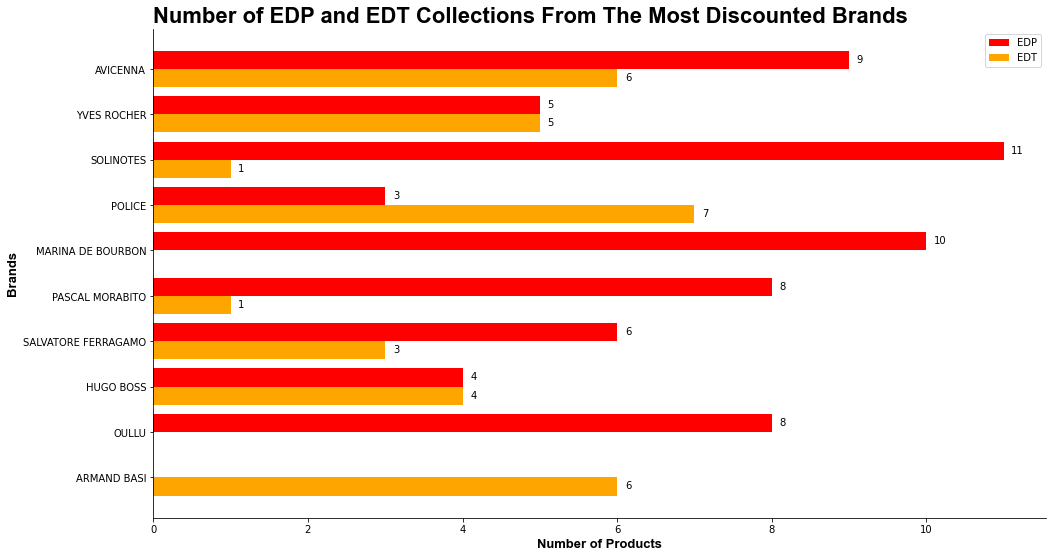

In [63]:
# Filter dataframe for edp/edt collections and most_discounted_brands
edp_most_discounted_brands = df[(df['brand'].isin(top10_brands)) & (df['type'] == 'EDP')]
edt_most_discounted_brands = df[(df['brand'].isin(top10_brands)) & (df['type'] == 'EDT')]

# Determine EDT and EDP collection for each brand
edp_values = edp_most_discounted_brands['brand'].value_counts().reindex(top10_brands)
edt_values = edt_most_discounted_brands['brand'].value_counts().reindex(top10_brands)

# Rannge value for y-axis
y_axis = np.arange(len(top10_brands))

# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))

# Horizontal and Multiple Bar Plot
bar_width = 0.4
ax.barh(y_axis - bar_width/2, edp_values, 
        height=bar_width, label='EDP',
        color= 'r')
ax.barh(y_axis + bar_width/2, edt_values, 
        height=bar_width, label='EDT', 
        color= 'orange')
# Reorder y-axis
ax.invert_yaxis()

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.25,
             str("{:.0f}".format(i.get_width())),
             size = 10)

# Add Plot Title
ax.set_title('Number of EDP and EDT Collections From The Most Discounted Brands',
            fontname = 'arial',
            size = 22,
            weight = 'bold',
            loc = 'left')

ax.set_xlabel('Number of Products',
              fontname = 'arial',
              size = 13,
              weight = 'semibold')


ax.set_ylabel('Brands',
              fontname = 'arial',
              size = 13,
              weight = 'semibold')

# Setting plot ticks and legends
ax.set_yticks(y_axis)
ax.set_yticklabels(top10_brands)
ax.legend()

# # Saving plot
plt.savefig('../visualization/number_edp_edt.png',dpi=1000)

# Showing plot
plt.show()
